In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import ward, dendrogram
import pandas as pd
import nltk
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib as mpl

In [81]:
stemmer = SnowballStemmer("english")
df = pd.read_csv('./dataset/test_meta.csv')
df.columns

Index(['Unnamed: 0', 'language', 'title', 'content', 'description',
       'provider_url', 'keywords', 'provider_display', 'provider_name',
       'total_count', 'comment_count', 'share_count', 'reaction_count',
       'reddit_upvotes', 'reddit_comments', 'date', 'title_len', 'content_len',
       'description_len'],
      dtype='object')

In [82]:
df['text'] = df['title'] + df['description'] + df['content'] 
df.columns

Index(['Unnamed: 0', 'language', 'title', 'content', 'description',
       'provider_url', 'keywords', 'provider_display', 'provider_name',
       'total_count', 'comment_count', 'share_count', 'reaction_count',
       'reddit_upvotes', 'reddit_comments', 'date', 'title_len', 'content_len',
       'description_len', 'text'],
      dtype='object')

In [83]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [84]:
def get_similarity_matrix(content_as_str):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2,
                                       stop_words='english',use_idf=True,
                                       tokenizer=tokenize_and_stem, ngram_range=(1,3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(content_as_str) #fit the vectorizer to synopses
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return (similarity_matrix, tfidf_matrix)

In [85]:
linkage_matrix = None
def dendogram(similarity_matrixm,lables=None):
    linkage_matrix = ward(similarity_matrix) # Define the linkage_matrix using ward clustering pre-computed distances
    mpl.rcParams['lines.linewidth'] = 10
    print(linkage_matrix)
    fig, ax = plt.subplots(figsize=(15, 20)) # Set size
    ax = dendrogram(linkage_matrix, orientation="right",labels=lables,color_threshold=8, distance_sort='ascending');

    plt.tick_params(\
        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        length = 25)
    plt.tick_params(\
        axis= 'y',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        labelsize = 20)
    plt.tick_params(width=50, length = 10)
    plt.tight_layout() # Show plot with tight layout

In [86]:
(similarity_matrix, tfdif_matrix) = get_similarity_matrix(df['text'])

C:\Users\gnsd1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [87]:
from pprint import pprint as pp
similarity_matrix[0]

array([1.        , 0.04761822, 0.01429394, 0.02937383, 0.12273654,
       0.09712884, 0.05730078, 0.0841059 , 0.00767666, 0.11284265,
       0.11348564, 0.21464991, 0.08192448, 0.19865707, 0.03898924,
       0.09437178, 0.04045479, 0.11949818, 0.05657361, 0.08360905,
       0.14132581, 0.08897037, 0.08812453, 0.02632033, 0.04291221,
       0.04309257, 0.04935491, 0.03190099, 0.10405852, 0.06188306,
       0.03579271, 0.0542433 , 0.1258929 , 0.1258929 , 0.12912444,
       0.09378533, 0.11836732, 0.15273143, 0.12363481, 0.12836115,
       0.06444383, 0.08967612, 0.09472018, 0.11216372, 0.10053889,
       0.1333976 , 0.09219688, 0.13004369, 0.12501678, 0.07581069,
       0.36004484, 0.09588196, 0.34290532, 0.38207752, 0.38207752,
       0.45406476, 0.03095462, 0.03095462, 0.03095462, 0.04609145,
       0.20938833, 0.23320187, 0.14258338, 0.10060575, 0.17966537,
       0.25687361, 0.09498731, 0.07159353, 0.17623861])

In [88]:
tfdif_matrix[0]

<1x144 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

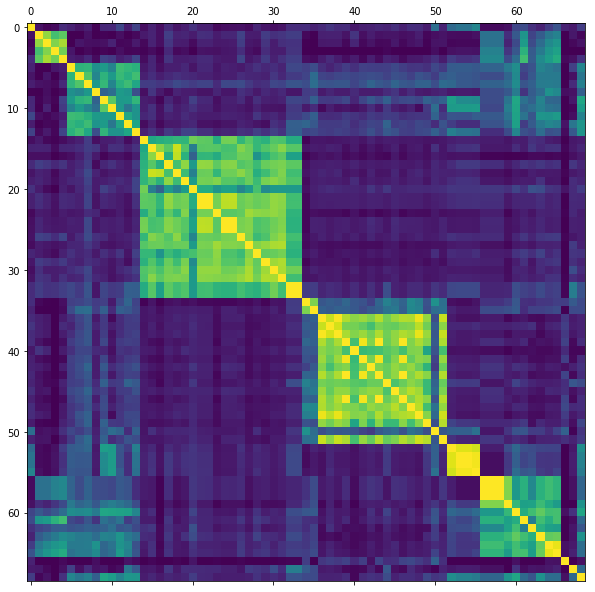

In [89]:
plt.figure(figsize=(20,10))
plt.matshow(similarity_matrix, fignum=1)
plt.show()

[[5.60000000e+01 5.70000000e+01 0.00000000e+00 2.00000000e+00]
 [5.80000000e+01 6.90000000e+01 0.00000000e+00 3.00000000e+00]
 [5.30000000e+01 5.40000000e+01 0.00000000e+00 2.00000000e+00]
 [3.20000000e+01 3.30000000e+01 0.00000000e+00 2.00000000e+00]
 [2.10000000e+01 2.20000000e+01 1.43638180e-02 2.00000000e+00]
 [2.40000000e+01 2.50000000e+01 2.08454734e-02 2.00000000e+00]
 [3.90000000e+01 4.30000000e+01 4.47429659e-02 2.00000000e+00]
 [4.60000000e+01 7.50000000e+01 7.63290061e-02 3.00000000e+00]
 [3.60000000e+01 3.80000000e+01 9.72521307e-02 2.00000000e+00]
 [5.50000000e+01 7.10000000e+01 1.93205826e-01 3.00000000e+00]
 [6.40000000e+01 6.50000000e+01 2.32155959e-01 2.00000000e+00]
 [4.10000000e+01 7.60000000e+01 2.34280797e-01 4.00000000e+00]
 [4.80000000e+01 7.70000000e+01 2.94353535e-01 3.00000000e+00]
 [5.20000000e+01 7.80000000e+01 3.08416515e-01 4.00000000e+00]
 [2.70000000e+01 3.10000000e+01 3.12700543e-01 2.00000000e+00]
 [4.50000000e+01 4.70000000e+01 3.28185080e-01 2.000000

C:\Users\gnsd1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\gnsd1\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


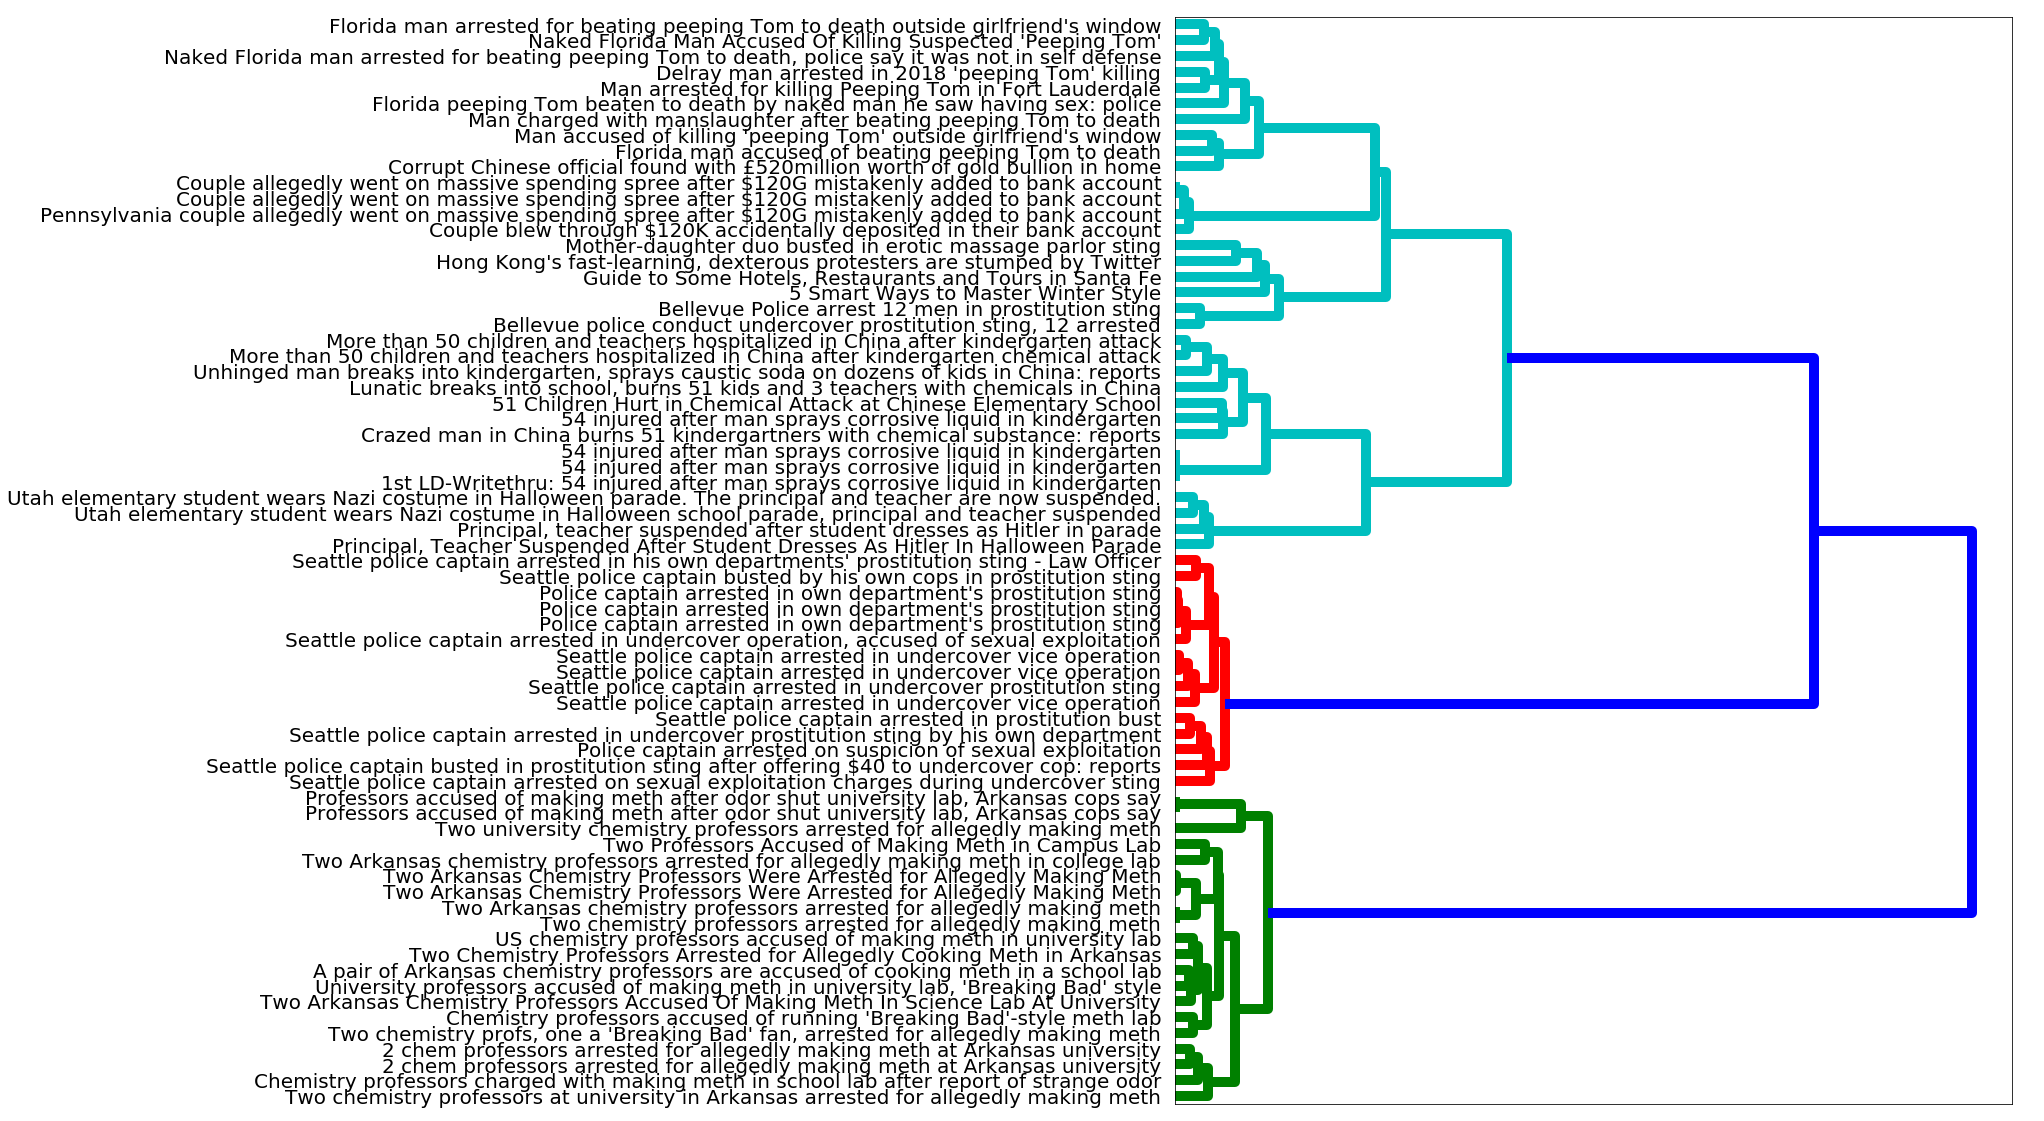

In [90]:
dendogram(similarity_matrix,df['title'].values)

In [91]:
from scipy.cluster.hierarchy import cut_tree

In [94]:
df['group']=cut_tree(ward(similarity_matrix),height=4)

In [95]:
df.sort_values(by=['group'])[['title','group']]

,title,group
0,"Hong Kong's fast-learning, dexterous protester...",0
66,"Guide to Some Hotels, Restaurants and Tours in...",0
50,Mother-daughter duo busted in erotic massage p...,0
35,Bellevue Police arrest 12 men in prostitution ...,0
67,5 Smart Ways to Master Winter Style,0
34,Bellevue police conduct undercover prostitutio...,0
1,Utah elementary student wears Nazi costume in ...,1
2,Utah elementary student wears Nazi costume in ...,1
3,"Principal, teacher suspended after student dre...",1
4,"Principal, Teacher Suspended After Student Dre...",1


In [101]:
df['total_count']

0       100
1       689
2     21635
3         3
4        12
5        36
6        24
7        83
8         4
9         0
10      947
11     1929
12       36
13     1032
14     7587
15      290
16      395
17        4
18        0
19      857
20       46
21       11
22      202
23     2581
24       13
25     2623
26      297
27        2
28     2716
29        0
      ...  
39     1274
40    14623
41     2835
42        0
43      192
44     1830
45     1752
46      631
47      144
48      112
49     2106
50     1898
51    14637
52     4604
53        0
54        2
55     5989
56        0
57        0
58        0
59        0
60      933
61      768
62     1474
63       91
64        0
65     3759
66        0
67       61
68      538
Name: total_count, Length: 69, dtype: int64

In [102]:
df.to_csv("./dataset/meta_v1.csv")